# Plotting Data with a Moving Average

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('./synth_temp.csv')
df.head()

,Region,Year,RgnAvTemp
0,A,1841,12.557395
1,B,1841,13.267048
2,E,1841,12.217463
3,F,1841,13.189420
4,A,1842,13.462887


There are 4 points in 1841
and 12 points in 2010
and 12 points in 1902


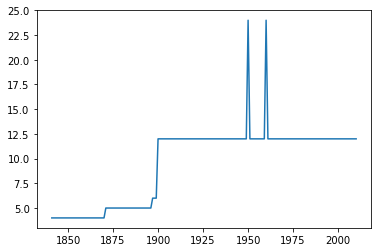

In [ ]:
# take a quick look at the number of data points per year
print('There are ' +str(len(df.loc[df['Year'] == 1841])) \
+ ' points in 1841\n' + 'and ' \
+ str(len(df.loc[df['Year'] ==2010])) \
+ ' points in 2010\n' + 'and ' \
+ str(len(df.loc[df['Year'] ==1902])) \
+ ' points in 1902')
# seeing there are different numbers of points, let's do a quick chart
fig, ax = plt.subplots()
ax.plot(df['Year'].unique(),
[len(df.loc[df['Year'] == i]) \
for i in df['Year'].unique()])
plt.show()

Let's slice the DataFrame to remove all rows
through 1901, as we can see that there is
much less data in those years:

In [ ]:
# slice 1902 and forward
df = df.loc[df.Year > 1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


Basic visualization of raw data after
filtering dates

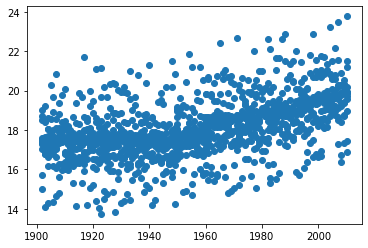

In [ ]:
# quick plot to understand what we have so far
fig, ax = plt.subplots()
ax.scatter(df.Year, df.RgnAvTemp)
plt.show()

Group the data by year and use
the agg method of the DataFrame to create
annual averages.

In [ ]:
# roll up by year
df_group_year =(df.groupby('Year').agg('mean')\
.rename(columns ={'RgnAvTemp' : 'AvgTemp'}))
print(df_group_year.head())
print(df_group_year.tail())

        AvgTemp
Year           
1902  17.385044
1903  17.222163
1904  17.217215
1905  17.817502
1906  17.386445
        AvgTemp
Year           
2006  19.904999
2007  19.820224
2008  19.245558
2009  19.537290
2010  19.919115


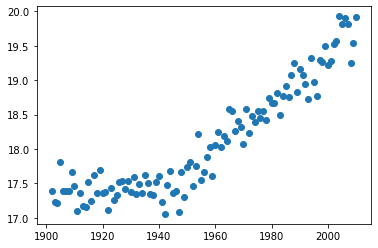

In [ ]:
# visualize result of averaging over each year
fig, ax = plt.subplots()
ax.scatter(df_group_year.index,
df_group_year['AvgTemp'])
plt.show()

Given that the data is still noisy, a moving
average filter can provide a useful indicator
of the overall trend.
A moving average filter
simply computes the average over the
last N values and assigns this average to
the Nth sample.

In [ ]:
window = 10
smoothed_df = \
pd.DataFrame(df_group_year.AvgTemp.rolling(window).mean())
smoothed_df.colums = 'AvgTemp'
print(smoothed_df.head(14))
print(smoothed_df.tail())



        AvgTemp
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.401761
1912  17.398872
1913  17.394177
1914  17.388443
1915  17.358825
        AvgTemp
Year           
2006  19.531170
2007  19.583102
2008  19.581256
2009  19.584580
2010  19.654919


Visualization of preprocessed
temperature data

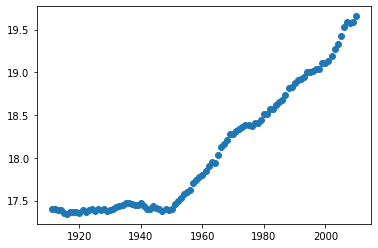

In [ ]:
# filter out the NaN values

smoothed_df =smoothed_df[smoothed_df['AvgTemp'].notnull()]
# quick plot to understand what we have so far
fig, ax = plt.subplots()
ax.scatter(smoothed_df.index,
smoothed_df['AvgTemp'])
plt.show()

measurements by year along
with the moving average signal:

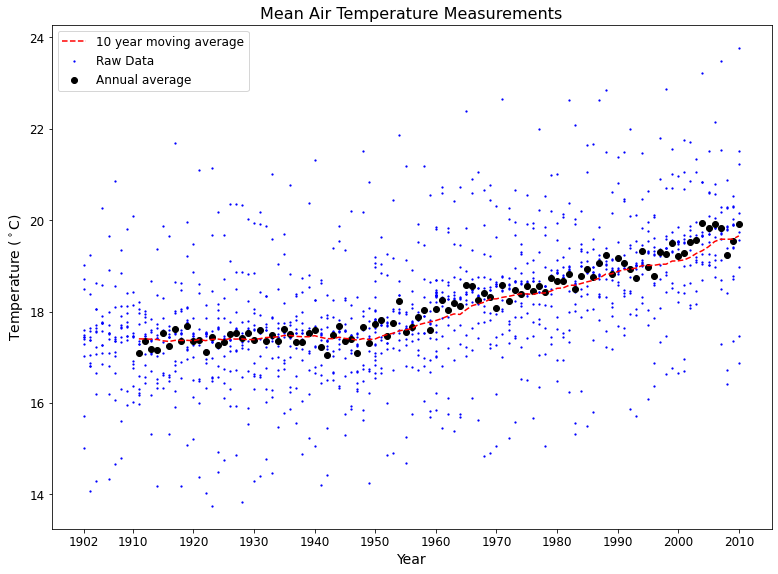

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, \
raw_plot_data.RgnAvTemp, \
label = 'Raw Data', c ='blue', s = 1.5)

# Annual averages
annual_plot_data = df_group_year\
.filter(items =
smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, \
annual_plot_data.AvgTemp, \
label = 'Annual average', c ='k')
# Moving averages
ax.plot(smoothed_df.index,
smoothed_df.AvgTemp, \
c = 'r', linestyle = '--', \
label = f'{window} year moving average')
ax.set_title('Mean Air Temperature Measurements', fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

Annual average temperature overlaid
on the 10-year moving average

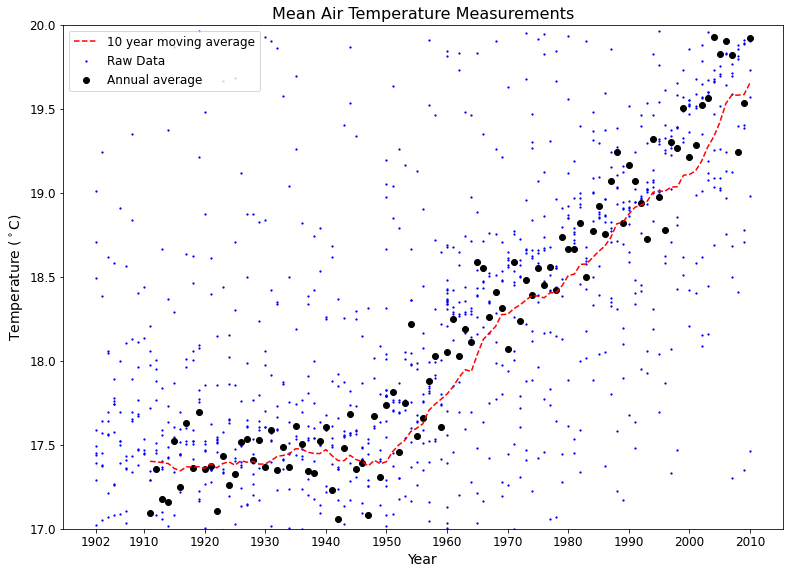

In [ ]:
# adjusting the y scale.


fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year,
raw_plot_data.RgnAvTemp, \
label = 'Raw Data', c ='blue', s = 1.5)

# Annual averages
annual_plot_data = df_group_year\
.filter(items =
smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, annual_plot_data.AvgTemp, \
label = 'Annual average', c ='k')
# Moving averages
ax.plot(smoothed_df.index, smoothed_df.AvgTemp, c = 'r', \
linestyle = '--', \
label = f'{window} year moving average')
ax.set_title('Mean Air Temperature Measurements', fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910,
2011, 10))
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', fontsize = 14)
ax.set_ylim(17, 20)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

Final plot of raw data, annual averages,
and smoothed data

# Modelling Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# load the data
df =pd.read_csv('./synth_temp.csv')

In [ ]:
# slice 1902 and forward
df = df.loc[df.Year > 1901]
# roll up by year
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' :
'mean'})
df_group_year.head(12)
# add the Year column so we can use that in a model

df_group_year['Year'] =df_group_year.index
df_group_year = \
df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})
df_group_year.head()

,AvTemp,Year
Year,,
1902,17.385044,1902
1903,17.222163,1903
1904,17.217215,1904
1905,17.817502,1905
1906,17.386445,1906


In [ ]:
# construct the model and inspect results
linear_model =LinearRegression(fit_intercept = True)

linear_model.fit(df_group_year['Year'].values.reshape((-1, 1)), \
df_group_year.AvTemp)
print('model slope = ',linear_model.coef_[0])
print('model intercept = ',linear_model.intercept_)
r2 =linear_model.score(df_group_year['Year']\
.values.reshape((-1, 1)), \
df_group_year.AvTemp)
print('r squared = ', r2)

model slope =  0.023522370249706537
model intercept =  -27.887365027932873
r squared =  0.8438499294671092


In [ ]:
# generate predictions for visualization
pred_X = df_group_year.loc[:, 'Year']
pred_Y =linear_model.predict(df_group_year['Year']\
.values.reshape((-1, 1)))

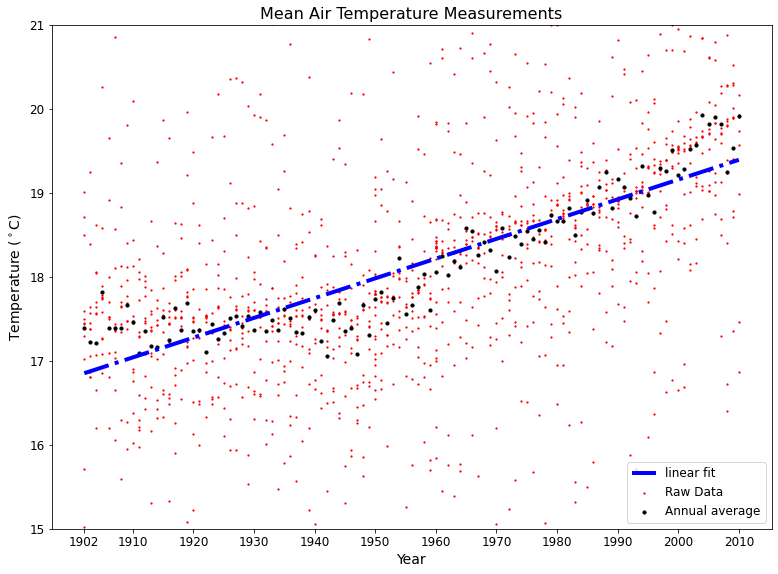

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year,
raw_plot_data.RgnAvTemp, \
label = 'Raw Data', c = 'red', s = 1.5)
# Annual averages
ax.scatter(df_group_year.Year, df_group_year.AvTemp, \
label = 'Annual average', c ='k', s = 10)
# linear fit
ax.plot(pred_X, pred_Y, c = "blue",linestyle = '-.', \
linewidth = 4, label = 'linear fit')
ax.set_title('Mean Air Temperature Measurements', fontsize = 16)
# make the ticks include the first and last years

tick_years = [1902] + list(range(1910,2011, 10))
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)',fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()